In [38]:
# Import
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

realtor_data = "Resources/RealtorData.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df
# data_types = realtor_file_df.dtypes
# data_types

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [39]:
# Finding total number of duplicates
realtor_file_df.duplicated().sum()

1249026

In [40]:
# Dropping the duplicates
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


In [41]:
nan_df = realtor_file_df.isna().any(axis=1)
nan_df

0           True
1           True
2           True
3           True
4           True
           ...  
1401061     True
1401062    False
1401063    False
1401064    False
1401065    False
Length: 1401066, dtype: bool

In [42]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0,No
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0,Yes
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0,Yes
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0,Yes


In [43]:
realtor_file_df.fillna(0,inplace=True)


In [44]:
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.00,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.00,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.00,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.00,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes
465516,for_sale,1.0,1.0,0.00,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1117009,for_sale,0.0,1.0,0.00,New York,New York,11432.0,0.0,2015-04-09,150000.0,Yes
1117465,for_sale,4.0,3.0,0.00,New York,New York,11375.0,2200.0,2021-10-18,1825500.0,Yes
1117972,for_sale,1.0,1.0,0.00,New York,New York,11375.0,0.0,2006-09-13,350000.0,Yes
1118260,for_sale,4.0,3.0,0.00,New York,New York,11423.0,0.0,1987-06-12,990000.0,Yes


In [45]:
clean_df= new_york_df.describe().round(2)
clean_df

,bed,bath,acre_lot,zip_code,house_size,price
count,55543.00,55543.00,55543.00,55543.00,55543.00,5.554300e+04
mean,1.93,2.05,0.00,10138.49,945.68,2.612112e+06
std,1.61,1.54,0.01,356.29,1589.13,4.578766e+06
min,0.00,0.00,0.00,0.00,0.00,0.000000e+00
25%,1.00,1.00,0.00,10016.00,0.00,6.950000e+05
50%,2.00,2.00,0.00,10023.00,635.00,1.265000e+06
75%,3.00,3.00,0.00,10036.00,1312.00,2.725000e+06
max,40.00,45.00,0.36,14094.00,61839.00,1.350000e+08


In [46]:
clean_df.corr()

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,1.000000,1.000000,0.958649,0.606454,-0.156233
bath,1.000000,1.000000,1.000000,0.958663,0.606525,-0.156145
acre_lot,1.000000,1.000000,1.000000,0.958544,0.605914,-0.156903
zip_code,0.958649,0.958663,0.958544,1.000000,0.696498,-0.007438
house_size,0.606454,0.606525,0.605914,0.696498,1.000000,0.690572
price,-0.156233,-0.156145,-0.156903,-0.007438,0.690572,1.000000


<Axes: >

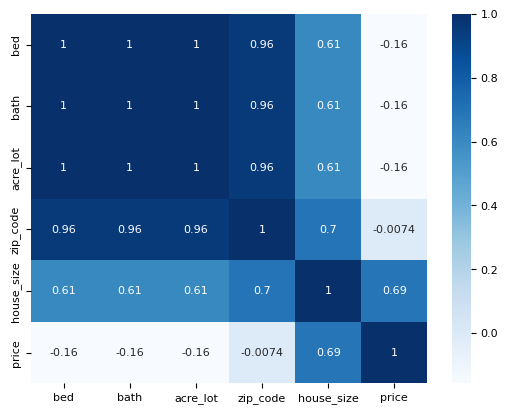

In [47]:
sns.heatmap(clean_df.corr(), annot=True, cmap="Blues")

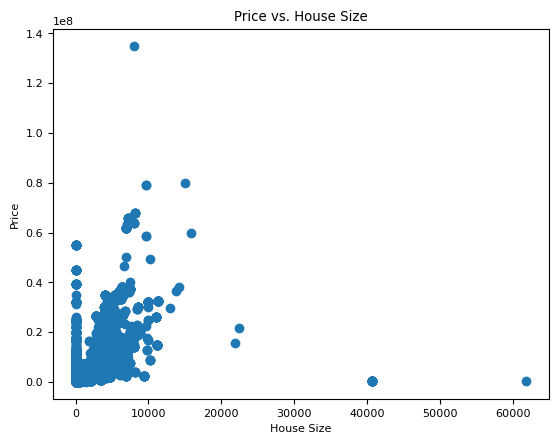

In [48]:
plt.scatter(new_york_df['house_size'], new_york_df['price'])
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Price vs. House Size')
plt.show()

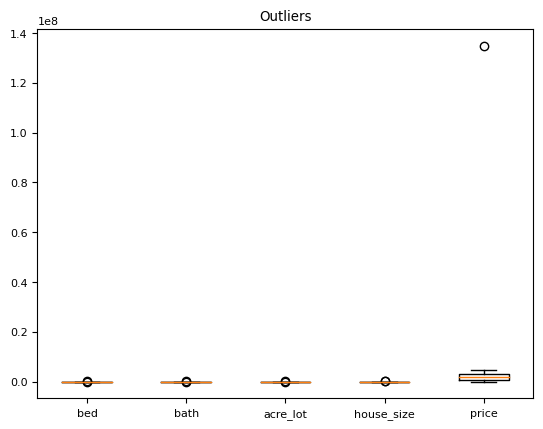

In [49]:
x_axis=['bed','bath','acre_lot','house_size','price']


plt.boxplot(clean_df[x_axis])
plt.xticks([1, 2, 3, 4, 5], x_axis)
plt.title('Outliers')
plt.show()

In [50]:
mean_numpy = round(np.mean(new_york_df["price"]),2)
print(f"The mean price in NY is {mean_numpy}")

median_numpy = round(np.median(new_york_df["price"]),2)
print(f"The median price in NY is {median_numpy}")

mode_scipy = st.mode(new_york_df["price"])
print(f"The mode price in NY is {mode_scipy}")

The mean price in NY is 2612111.87
The median price in NY is 1265000.0
The mode price in NY is ModeResult(mode=995000.0, count=681)


In [51]:
print(st.normaltest(new_york_df["price"].sample(10000)))

NormaltestResult(statistic=11337.946334244962, pvalue=0.0)


In [52]:
var_numpy = np.var(new_york_df["price"],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(new_york_df["price"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 20964716425480.19
The population standard deviation using the NumPy module is 4578724.322939763


In [53]:
z_scipy = st.zscore(new_york_df["price"])
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 465089    -0.311683
465111     5.980462
465513    -0.375020
465515    -0.355364
465516    -0.393584
             ...   
1117009   -0.537729
1117465   -0.171797
1117972   -0.494048
1118260   -0.354272
1398091   -0.544499
Name: price, Length: 55543, dtype: float64


In [54]:
quartiles = new_york_df["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 695000.0
The upper quartile of price is: 2725000.0
The interquartile range of price is: 2030000.0
The the median of price is: 1265000.0 
Values below -2350000.0 could be outliers.
Values above 5770000.0 could be outliers.


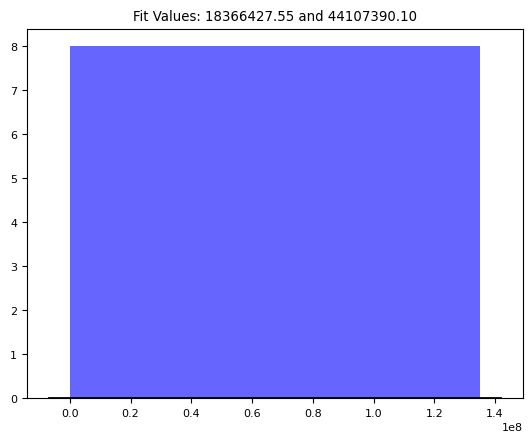

In [55]:
plt.hist(clean_df["price"], bins=1, alpha=0.6, color='b')
 
# Plot the PDF.
mu, std = st.norm.fit(clean_df["price"]) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
 
plt.show()

#prolly wont use this at all. oh whale

In [56]:
new_york_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes


In [57]:
new_york_df.bed.unique()

array([ 2., 12.,  1.,  3.,  4.,  0.,  5.,  7., 11.,  6., 10., 13.,  8.,
        9., 17., 14., 24., 40., 35.])

In [58]:
new_york_df.bath.unique()

array([ 2., 14.,  1.,  5.,  3.,  4.,  6., 11.,  7.,  9., 10., 12.,  0.,
        8., 17., 16., 19., 13., 15., 24., 45.])

In [59]:
new_york_df2 = new_york_df.copy()

In [60]:
new_york_df2["bed-bath"] = new_york_df2.bed.astype(int).astype(str) + "-" + new_york_df2.bath.astype(int).astype(str)

In [61]:
new_york_df2.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded,bed-bath
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No,2-2
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No,12-14
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No,2-2
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes,1-2
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes,1-1


In [62]:
df = new_york_df2[["bed-bath","price"]].groupby("bed-bath",as_index=False).agg({"price":["mean","count"]}) 
df

bed-bath         price      
                     mean count
0       0-0  2.561209e+06   316
1       0-1  5.782636e+05  6797
2       0-2  1.400727e+06   242
3       0-3  4.266077e+06    13
4       0-4  4.233167e+06     6
..      ...           ...   ...
84     9-13  8.000000e+07     1
85      9-4  3.950000e+06    37
86      9-5  5.697500e+06    12
87      9-6  3.995000e+06     4
88      9-9  2.999500e+07     1

[89 rows x 3 columns]

In [63]:
df.columns = ["bed-bath", "avg_price", "count"]
df

,bed-bath,avg_price,count
0,0-0,2.561209e+06,316
1,0-1,5.782636e+05,6797
2,0-2,1.400727e+06,242
3,0-3,4.266077e+06,13
4,0-4,4.233167e+06,6
...,...,...,...
84,9-13,8.000000e+07,1
85,9-4,3.950000e+06,37
86,9-5,5.697500e+06,12
87,9-6,3.995000e+06,4


In [64]:
df = df.sort_values(by='count', ascending=False)
df = df.head(10)
df

,bed-bath,avg_price,count
8,1-1,8.588254e+05,15076
25,2-2,1.863496e+06,9415
1,0-1,5.782636e+05,6797
24,2-1,8.715865e+05,3535
32,3-3,3.776891e+06,3224
26,2-3,3.664013e+06,2667
31,3-2,2.101309e+06,2526
9,1-2,1.529563e+06,2382
33,3-4,6.640155e+06,2042
41,4-4,6.336167e+06,1238


In [65]:
df['Cumulative Percentage'] = df['count'].cumsum() / df['count'].sum() * 100
df

,bed-bath,avg_price,count,Cumulative Percentage
8,1-1,8.588254e+05,15076,30.829005
25,2-2,1.863496e+06,9415,50.081796
1,0-1,5.782636e+05,6797,63.981023
24,2-1,8.715865e+05,3535,71.209766
32,3-3,3.776891e+06,3224,77.802544
26,2-3,3.664013e+06,2667,83.256309
31,3-2,2.101309e+06,2526,88.421741
9,1-2,1.529563e+06,2382,93.292708
33,3-4,6.640155e+06,2042,97.468406
41,4-4,6.336167e+06,1238,100.000000


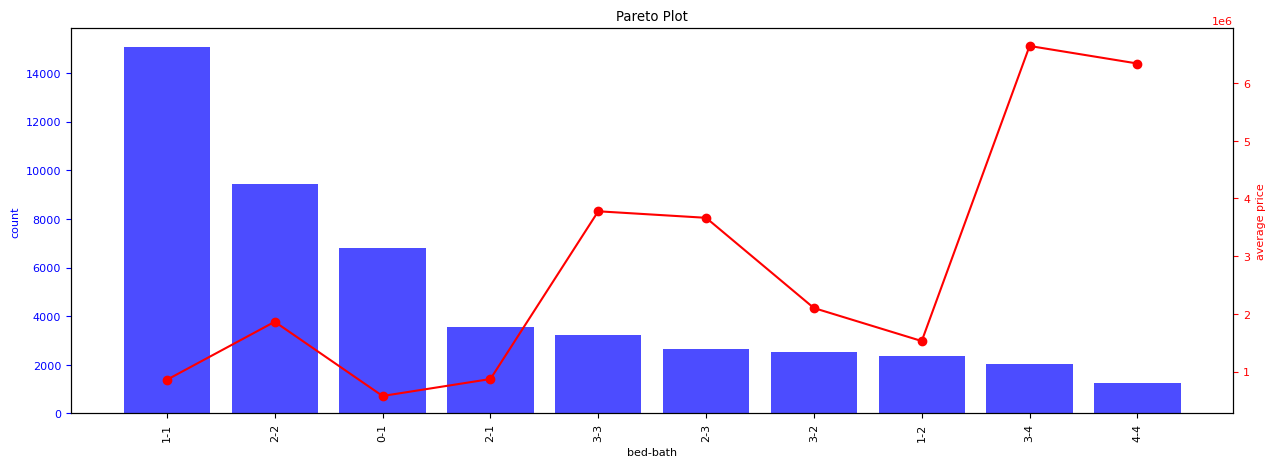

In [66]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(df['bed-bath'], df['count'], color='b', alpha=0.7, label='count')
ax1.set_xlabel('bed-bath')
ax1.set_ylabel('count', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation="vertical")

ax2 = ax1.twinx()
ax2.plot(df['bed-bath'], df['avg_price'], color='r', marker='o', label='avg price')
ax2.set_ylabel('average price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Plot')
plt.show()

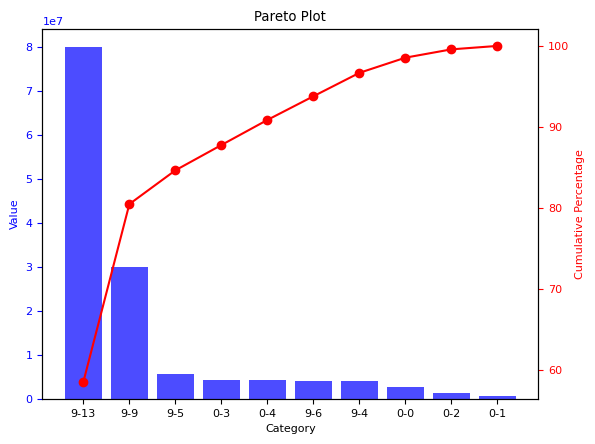

In [67]:
# Assuming your dataframe is named df
data = {'Category': ['0-0', '0-1', '0-2', '0-3', '0-4', '9-13', '9-4', '9-5', '9-6', '9-9'],
        'Value': [2.561209e+06, 5.782636e+05, 1.400727e+06, 4.266077e+06, 4.233167e+06, 8.000000e+07, 3.950000e+06, 5.697500e+06, 3.995000e+06, 2.999500e+07],
        'Frequency': [316, 6797, 242, 13, 6, 1, 37, 12, 4, 1]}
df = pd.DataFrame(data)

# Sort the dataframe by 'Value' in descending order
df = df.sort_values(by='Value', ascending=False)

# Calculate cumulative percentage
df['Cumulative Percentage'] = df['Value'].cumsum() / df['Value'].sum() * 100

# Plotting Pareto chart
fig, ax1 = plt.subplots()

ax1.bar(df['Category'], df['Value'], color='b', alpha=0.7, label='Value')
ax1.set_xlabel('Category')
ax1.set_ylabel('Value', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df['Category'], df['Cumulative Percentage'], color='r', marker='o', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Plot')
plt.show()

# Visualisation of the data to show Price by Zip Code

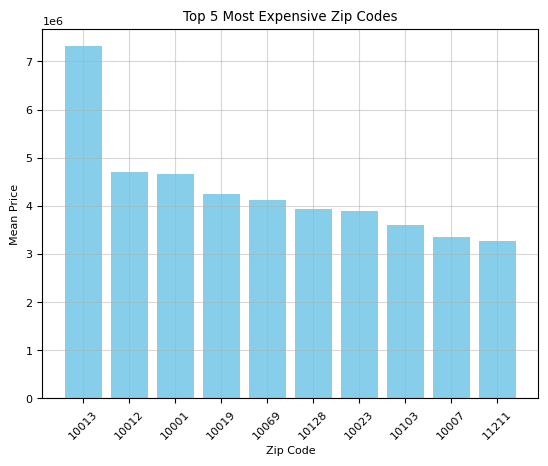

In [68]:
# Convert zip_code to string data type and extract numeric part
new_york_df2['zip_code_num'] = new_york_df2['zip_code'].astype(str).str.extract('(\d+)')

# Calculate mean price for each zip code
mean_price = new_york_df2.groupby('zip_code_num')['price'].mean()

# Sort zip codes by mean price in descending order
most_expensive_zips = mean_price.sort_values(ascending=False).head(10)

# Sort zip codes by mean price in ascending order
least_expensive_zips = mean_price.sort_values().head(10)

# Plot top 5 most expensive zip codes
plt.bar(most_expensive_zips.index, most_expensive_zips.values, color='skyblue')
plt.title('Top 5 Most Expensive Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 8
plt.show()

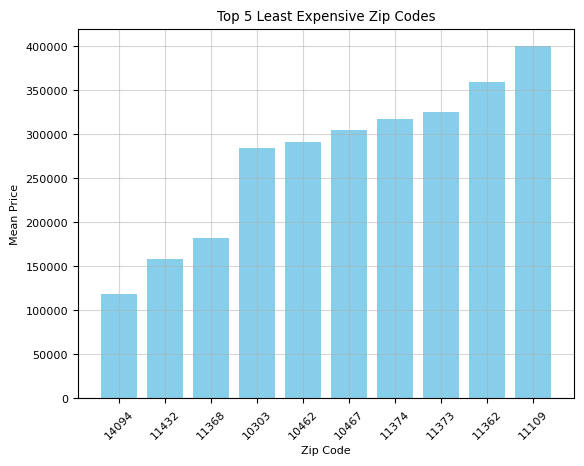

In [69]:
# Plot top 5 least expensive zip codes
plt.bar(least_expensive_zips.index, least_expensive_zips.values, color='skyblue')
plt.title('Top 5 Least Expensive Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 8
plt.show()

# Analysis of the price points by zip code
So, after taking a quick look at the data, I can easily spot which zip codes are living the high life and which ones are more budget-friendly. This helps us figure out what's driving the real estate scene. By checking out the price differences in different areas, we get a sense of the mix of factors like income, people, and location that shape how things play out in the housing market. Knowing this stuff comes in handy for making smart choices, whether you're thinking about investments, predicting where the market's headed, or considering new rules and policies.